Dans ce problème, on va utiliser le Dataset https ://www.kaggle.com/saurabh00007/diabetescsv

### — Ouvrir un data set à l’aide de pandas et récupérer un dataframe

In [6]:
import pandas as pd

# Charger le jeu de données dans un DataFrame Pandas
df = pd.read_csv("data/diabetes.csv")

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### — Connaitre les dimensions du dataframe

In [9]:
dimensions = df.shape
print("Dimensions du Dataframe :", dimensions)

Dimensions de Dataframe : (768, 9)


### — Explorer la liste des colonnes

In [10]:
colonnes = df.columns
print("Liste des colonnes :", colonnes)

columns du Dataframe : Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


### — Récupérer une colonne, un ensemble de colonnes

In [31]:
age = df['Age']
bmi = df['BMI']
age_bmi = df[["Age", "BMI"]]

In [32]:
age.head()

0    50
1    31
2    32
3    21
4    33
Name: Age, dtype: int64

In [33]:
age_bmi.head()

,Age,BMI
0,50,33.6
1,31,26.6
2,32,23.3
3,21,28.1
4,33,43.1


### — Le max, le min, la moyenne d’une colonne

In [47]:
max_age = age.max()
print("Max age =", max_age)

min_bmi = bmi.min()
print("Min bmi =", min_bmi)

moy_age = age.mean()
print("Moyenne Age: {:.2f}".format(moy_age))

Max age = 81
Min bmi = 0.0
Moyenne Age: 33.24


### Pour faire la classification, on se base sur la variable indépendante Glucose et la variable dépendante outcome de diabetes.csv

## 1. Quelles sont les principales étapes à suivre pour établir un modèle de Single Variate Logistic Regression basé sur sklearn ?

### 1.1. Importez les bibliothèques nécessaires :

Importez les bibliothèques nécessaires, y compris Pandas pour la manipulation des données, Scikit-Learn pour la création du modèle, et Matplotlib si vous souhaitez visualiser les résultats.

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plts

### 1.2. Chargez le jeu de données :

Utilisez Pandas pour charger le jeu de données "diabetes.csv" dans un DataFrame.

In [56]:
df = pd.read_csv("data/diabetes.csv")

### 1.3. Sélectionnez les données pertinentes :

Sélectionnez les colonnes "Glucose" comme variable indépendante (caractéristique) et "outcome" comme variable dépendante (étiquette) du DataFrame.

In [58]:
X = df[["Glucose"]]
y = df["Outcome"]

### 1.4. Divisez les données en ensembles d'apprentissage et de test :

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Les arguments `test_size` et `random_state` sont couramment utilisés lors de la division d'un ensemble de données en ensembles d'apprentissage et de test dans le cadre de l'apprentissage automatique. Voici ce que ces arguments signifient :

1. `test_size` : C'est le paramètre qui détermine la proportion de l'ensemble de données qui sera réservée pour l'ensemble de test. Dans cet exemple, `test_size=0.3` signifie que 30 % de l'ensemble de données sera utilisé comme ensemble de test, et 70 % sera utilisé comme ensemble d'apprentissage. Le choix de cette proportion dépend souvent de la taille de l'ensemble de données et des besoins spécifiques du problème. Une division courante est 70-30 ou 80-20.

2. `random_state` : C'est une valeur de graine (seed) pour le générateur de nombres aléatoires. Lorsque vous divisez votre ensemble de données en ensembles d'apprentissage et de test de manière aléatoire, vous souhaitez généralement que cette division soit reproductible. En fixant `random_state` à une valeur spécifique (comme `random_state=42`), vous garantissez que la division sera la même chaque fois que vous exécutez le code. Cela est utile pour la reproductibilité des résultats et pour déboguer votre modèle. Vous pouvez choisir n'importe quelle valeur pour `random_state`, tant que vous l'utilisez de manière cohérente.

Le choix de la valeur de `random_state` est généralement arbitraire, mais il est courant d'utiliser des valeurs telles que 42, 0, 1 ou tout autre nombre entier. L'important est de s'assurer que la division des données reste cohérente d'une exécution à l'autre, de manière à ce que vous puissiez comparer et évaluer votre modèle de manière reproductible.

### 1.5. Créez le modèle de régression logistique :

In [63]:
model = LogisticRegression()

### 1.6. Entraînez le modèle :

Utilisez les données d'apprentissage pour entraîner le modèle.

In [64]:
model.fit(X_train, y_train)

LogisticRegression()

### 1.7. Prédisez les étiquettes pour l'ensemble de test :

Utilisez le modèle pour prédire les étiquettes de l'ensemble de test.

In [65]:
y_pred = model.predict(X_test)

### 1.8. Évaluez la performance du modèle :

Évaluez la performance du modèle en utilisant des métriques telles que la matrice de confusion, le rapport de classification, et la précision, le rappel, le F1-score, etc.

In [66]:
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

Matrice de confusion :
[[128  23]
 [ 41  39]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       151
           1       0.63      0.49      0.55        80

    accuracy                           0.72       231
   macro avg       0.69      0.67      0.67       231
weighted avg       0.71      0.72      0.71       231



### 1.9. Visualisez les résultats (facultatif) :

Vous pouvez également visualiser les résultats en traçant la régression logistique avec les données d'entraînement et les points de données d'essai.

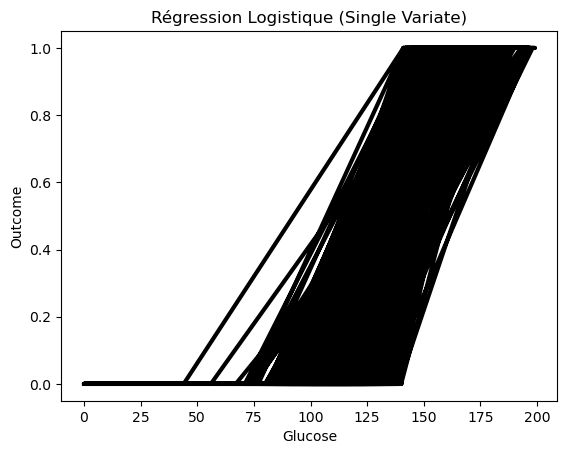

In [73]:
# plt.scatter(X_train, y_train, color='blue')
# plt.scatter(X_test, y_test, color='red')
plt.plot(X, model.predict(X), color='black', linewidth=3)
plt.xlabel("Glucose")
plt.ylabel("Outcome")
plt.title("Régression Logistique (Single Variate)")
plt.show()

La visualisation des résultats d'un modèle de régression logistique univariée peut aider à mieux comprendre comment le modèle prend des décisions et comment il se comporte par rapport aux données d'entraînement et de test. Dans l'exemple donné précédemment, nous avons tracé la régression logistique et les points de données pour visualiser les résultats. Voici une explication plus détaillée de cette visualisation :

1. **Points de données d'entraînement et de test** : Les points de données d'entraînement et de test sont affichés sur le graphique. Les points d'entraînement sont en bleu, tandis que les points de test sont en rouge. Cela permet de visualiser comment le modèle a été ajusté aux données d'entraînement et comment il se généralise aux données de test.

2. **Régression logistique** : La ligne noire représente la régression logistique, qui est l'ajustement du modèle aux données. En utilisant la variable "Glucose" comme caractéristique, la régression logistique modélise la probabilité que la variable "outcome" soit égale à 1 (par exemple, diabétique) en fonction de la valeur de "Glucose". Cette courbe illustre comment le modèle classe les données en fonction de cette probabilité.

3. **Axe des X** : L'axe horizontal représente les valeurs de la variable "Glucose", qui est la caractéristique que nous utilisons pour effectuer la prédiction.

4. **Axe des Y** : L'axe vertical représente les valeurs de la variable "Outcome", qui est la variable que nous essayons de prédire. Dans cet exemple, "Outcome" est une variable binaire, donc elle peut prendre deux valeurs : 0 ou 1.

La régression logistique tente de trouver une relation entre la variable indépendante (dans ce cas, "Glucose") et la probabilité de la variable dépendante (dans ce cas, "Outcome" égale à 1). La ligne noire est la courbe de régression logistique qui représente cette relation. Plus la probabilité est proche de 1, plus le modèle prédit que la personne est diabétique (Outcome = 1), et plus la probabilité est proche de 0, plus le modèle prédit qu'elle ne l'est pas (Outcome = 0).

En visualisant cette courbe, vous pouvez voir comment le modèle prend des décisions en fonction de la caractéristique "Glucose". Si les points de données d'entraînement et de test sont bien alignés avec la courbe, cela suggère que le modèle est capable de bien généraliser et de prendre des décisions précises. Si les points de données sont dispersés ou si la courbe de régression est incorrecte, cela peut indiquer que le modèle a des performances médiocres. La visualisation aide à évaluer visuellement la performance du modèle et à comprendre comment il classe les données en fonction de la caractéristique "Glucose".

Ces étapes vous permettront de créer, entraîner et évaluer un modèle de régression logistique univariée basé sur la variable "Glucose" pour prédire la variable "outcome" du jeu de données "diabetes.csv". Vous pouvez personnaliser davantage le modèle en ajustant les hyperparamètres et en utilisant des techniques de validation croisée pour évaluer sa robustesse.